In [424]:
import pandas as pd
import csv 
import torch.nn as nn
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

import numpy as np 


In [425]:
c_sales=pd.read_csv(r"E:\PycharmProjects\Data_preprocess\cust_detail_clustering.csv")
c_purchase=pd.read_csv(r"E:\PycharmProjects\Data_preprocess\cust_purchase_data.csv")
c_sales.head(10)

,CustomerID,StateName,DistrictName,CityName,PINCode,AreaName,Acount date
0,D46AFA67-4EA5-EA11-A812-000D3AF05A4B,BIHAR,EAST CHAMPARAN,MOTIHARI-BR,845401,MOTIHARI CHOWK,03-06-2020
1,43765521-0C11-E911-A950-000D3AF00F43,HIMACHAL PRADESH,SHIMLA,KUMARSAIN-HP,172030,KUMARSAIN-HP,05-01-2019
2,4491287C-59C9-EC11-A7B5-000D3AF026BB,ANDHRA PRADESH,KRISHNA,GUDIVADA-AP,521301,RAJENDRANAGAR COLONY,01-05-2022
3,F169B2EE-C8CA-EC11-A7B5-000D3AF026BB,TAMIL NADU,CUDDALORE,CHIDAMBARAM-TN,608001,CHIDAMBARAM,03-05-2022
4,BE697552-D3CA-EC11-A7B5-000D3AF026BB,RAJASTHAN,JAIPUR,JAIPUR-RJ,302015,BAJAJ NAGAR,03-05-2022
5,89DE670E-EACA-EC11-A7B5-000D3AF026BB,WEST BENGAL,SOUTH 24 PARGANAS,SOUTH 24 PARGANAS-WB,743372,BAHARU,03-05-2022
6,50A741A9-9DCB-EC11-A7B5-000D3AF026BB,DELHI,SOUTH DELHI,SOUTH DELHI-DL,110080,SANGAM VIHAR,04-05-2022
7,B3C131E3-A7CB-EC11-A7B5-000D3AF026BB,PUNJAB,SANGRUR,KHANAURI-PB,148027,ANDANA,04-05-2022
8,5A77D0C1-A9CB-EC11-A7B5-000D3AF026BB,GUJARAT,SURAT,SACHIN-GJ,394230,BONANDH,04-05-2022
9,6F3EA02F-B0CB-EC11-A7B5-000D3AF026BB,ANDHRA PRADESH,GUNTUR,GUNTUR-AP,522601,GUNTUR-AP,04-05-2022


In [426]:
c_sales['month'] = pd.DatetimeIndex(c_sales['Acount date'], dayfirst=True).month
c_sales['year'] = pd.DatetimeIndex(c_sales['Acount date'], dayfirst=True).year
c_sales['week'] = pd.DatetimeIndex(c_sales['Acount date'], dayfirst=True).week

c_sales.head(-10)

C:\Users\33669\AppData\Local\Temp\1\ipykernel_32680\4159171285.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  c_sales['week'] = pd.DatetimeIndex(c_sales['Acount date'], dayfirst=True).week


,CustomerID,StateName,DistrictName,CityName,PINCode,AreaName,Acount date,month,year,week
0,D46AFA67-4EA5-EA11-A812-000D3AF05A4B,BIHAR,EAST CHAMPARAN,MOTIHARI-BR,845401,MOTIHARI CHOWK,03-06-2020,6,2020,23
1,43765521-0C11-E911-A950-000D3AF00F43,HIMACHAL PRADESH,SHIMLA,KUMARSAIN-HP,172030,KUMARSAIN-HP,05-01-2019,1,2019,1
2,4491287C-59C9-EC11-A7B5-000D3AF026BB,ANDHRA PRADESH,KRISHNA,GUDIVADA-AP,521301,RAJENDRANAGAR COLONY,01-05-2022,5,2022,17
3,F169B2EE-C8CA-EC11-A7B5-000D3AF026BB,TAMIL NADU,CUDDALORE,CHIDAMBARAM-TN,608001,CHIDAMBARAM,03-05-2022,5,2022,18
4,BE697552-D3CA-EC11-A7B5-000D3AF026BB,RAJASTHAN,JAIPUR,JAIPUR-RJ,302015,BAJAJ NAGAR,03-05-2022,5,2022,18
...,...,...,...,...,...,...,...,...,...,...
83621,B492512B-5E33-ED11-9DB2-6045BDAC5897,UTTAR PRADESH,KANPUR NAGAR,KANPUR-UP,208013,KANPUR-UP,13-09-2022,9,2022,37
83622,F5F47734-A00D-ED11-B83E-6045BDAC5897,WEST BENGAL,NORTH 24 PARGANAS,AKANDAKESHARI-WB,700135,AKANDAKESHARI,27-07-2022,7,2022,30
83623,B2979BD9-480E-ED11-B83E-6045BDAC5897,GUJARAT,DAHOD,JHALOD-GJ,389170,FULPURA,28-07-2022,7,2022,30
83624,CFC5A6C0-EFDB-EC11-A7B5-6045BDAD211A,JAMMU AND KASHMIR,KATHUA,HIRANAGAR-JK,184141,GHAGWAL,25-05-2022,5,2022,21


In [427]:
le = preprocessing.LabelEncoder()
le.fit(c_sales.StateName.unique())
c_sales.StateName = le.transform(c_sales.StateName)

le = preprocessing.LabelEncoder()
le.fit(c_sales.DistrictName.unique())
c_sales.DistrictName = le.transform(c_sales.DistrictName)

le = preprocessing.LabelEncoder()
le.fit(c_sales.AreaName.unique())
c_sales.AreaName = le.transform(c_sales.AreaName)

le = preprocessing.LabelEncoder()
le.fit(c_sales.AreaName.unique())
c_sales.AreaName = le.transform(c_sales.AreaName)


le = preprocessing.LabelEncoder()
le.fit(c_sales.CityName.unique())
c_sales.CityName = le.transform(c_sales.CityName)

c_sales.drop(['Acount date'],axis=1, inplace=True)

c_sales.head(-5)



,CustomerID,StateName,DistrictName,CityName,PINCode,AreaName,month,year,week
0,D46AFA67-4EA5-EA11-A812-000D3AF05A4B,4,166,2325,845401,12842,6,2020,23
1,43765521-0C11-E911-A950-000D3AF00F43,14,520,1993,172030,11600,1,2019,1
2,4491287C-59C9-EC11-A7B5-000D3AF026BB,1,335,1297,521301,14567,5,2022,17
3,F169B2EE-C8CA-EC11-A7B5-000D3AF026BB,30,124,868,608001,6798,5,2022,18
4,BE697552-D3CA-EC11-A7B5-000D3AF026BB,28,243,1496,302015,3403,5,2022,18
...,...,...,...,...,...,...,...,...,...
83626,D1559F46-02D4-EC11-A7B6-6045BDAD211A,4,596,549,844114,2376,5,2022,19
83627,9764CE86-BADC-EC11-BB3C-6045BDAD211A,10,167,1119,110094,8080,5,2022,21
83628,B4F84E30-2CE3-EC11-BB3C-6045BDAD211A,20,459,1385,411045,3903,6,2022,22
83629,9D87DCC3-ACE8-EC11-BB3C-6045BDAD211A,12,2,3563,380050,16904,6,2022,23


In [428]:
c_purchase = c_purchase[~c_purchase['Category'].isin(['HAVELLS CP', 'HAVELLS CAPACITOR', 'HAVELLS MOTOR', 'STANDARD CP', 'SOLAR LSP', 'HAVELLS PLUM', 'STANDARD IP'])] #Drop these categories

le_sku = preprocessing.LabelEncoder()
le_sku.fit(c_purchase.SKU.unique())
c_purchase.SKU = le_sku.transform(c_purchase.SKU)



le_cat = preprocessing.LabelEncoder()
le_cat.fit(c_purchase.Category.unique())
c_purchase.Category = le_cat.transform(c_purchase.Category)

le_cat_mapping = dict(zip(le_cat.transform(le_cat.classes_), le_cat.classes_))
print(le_cat_mapping)

le_brand = preprocessing.LabelEncoder()
le_brand.fit(c_purchase.brand.unique())
c_purchase.brand = le_brand.transform(c_purchase.brand)

le_cid = preprocessing.LabelEncoder()
le_cid.fit(c_purchase.CustomerID.unique())
c_purchase.CustomerID = le_cid.transform(c_purchase.CustomerID)

c_purchase['Price'] = c_purchase['Price'].astype(int)
c_purchase.drop('SubCategory', inplace=True, axis=1)





{0: 'CONSUMER LIGHTING', 1: 'CRABTREE BCP', 2: 'CRABTREE EWA', 3: 'HAVELLS AIR COOLER', 4: 'HAVELLS AQUA', 5: 'HAVELLS BCP', 6: 'HAVELLS CABLE', 7: 'HAVELLS EWA', 8: 'HAVELLS FAN', 9: 'HAVELLS GROOMING', 10: 'HAVELLS IP', 11: 'HAVELLS PUMP', 12: 'HAVELLS SDA', 13: 'HAVELLS WATER HEATER', 14: 'HAVELLS WIRE', 15: 'LLOYD AIR CONDITIONER', 16: 'LLOYD LED TELEVISION', 17: 'LLOYD REFRIGERATORS', 18: 'LLOYD WASHING MACHIN', 19: 'REO BCP', 20: 'REO EWA', 21: 'REO FAN', 22: 'REO WIRE.', 23: 'SOLAR OTHERS', 24: 'STANDARD BCP', 25: 'STANDARD EWA', 26: 'STANDARD FAN', 27: 'STANDARD WATERHEATER'}


In [429]:
cat_wise_data = c_purchase.copy(deep=True)

for i in range(0, len(le_cat_mapping.keys())):
    col = 'categ_{}'.format(i)
    df_temp = cat_wise_data[cat_wise_data['Category'] == i]
    cat_wise_data.loc[:, col] = df_temp['Price']
    cat_wise_data[col].fillna(0, inplace = True)
    
# (cat_wise_data.query("Category==(34,0,2)"))
cat_wise_data.sort_values('CustomerID', ascending = True)[:20]

,CustomerID,SKU,Category,brand,hil_invoicedate,sku_registration_date,Price,categ_0,categ_1,categ_2,...,categ_18,categ_19,categ_20,categ_21,categ_22,categ_23,categ_24,categ_25,categ_26,categ_27
123512,0,3040,17,3,20-04-2022,24-04-2022,18490,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85761,0,3040,17,3,20-04-2022,24-04-2022,20190,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236544,1,2620,13,2,25-10-2022,25-10-2022,16290,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35646,2,501,25,6,18-12-2021,27-09-2022,53,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0
33016,3,3377,15,3,04-03-2022,09-09-2022,58990,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
461172,3,3416,15,3,03-03-2022,09-09-2022,60990,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33017,3,3416,15,3,08-04-2022,09-09-2022,60990,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
673652,4,1437,8,2,15-03-2022,08-05-2022,3355,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
721438,4,1437,8,2,15-03-2022,08-05-2022,3220,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
326599,4,1437,8,2,15-03-2022,08-05-2022,2980,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [430]:
median_dict = {}
average_spend = {}


with open(r'C:\Users\33669\Downloads\santa.csv', mode='r') as csv_file:
    csvFile = csv.reader(csv_file, delimiter=',')
    for col in csvFile:
        try:
            temp_list = [str(col[1].strip(' '))]
            category = f'categ_{le_cat.transform(temp_list)[0]}'
            median_dict[category] = float(col[0].strip(' '))
        except ValueError:
            # print('Error finding')
            # print(col[1].strip(' '))
            pass
        
# print(median_dict)

transactions_per_user = cat_wise_data.groupby(by=['CustomerID'])['Price'].agg(['count','min','max','mean','sum'])
temp_df = transactions_per_user.copy(deep=True)


# print(f'Total Users: {temp_df.CustomerID.count()}\n')
print(f'Category : User Count')
for i in range(0, len(le_cat_mapping.keys())):
    col = 'categ_{}'.format(i)
    temp_df.loc[:,col]= cat_wise_data.groupby(by=['CustomerID'])[col].sum()
    average_spend[col] = int(temp_df[col].sum() / temp_df.query(f"{col}!=(0.0)").shape[0])
    print(f'{le_cat_mapping.get(i)}: {temp_df.query(f"{col}!=(0.0)").shape[0]}')

print("\nCategory mapping: \n" + ",\n".join("{!r}: {!r}".format(k, v) for k, v in le_cat_mapping.items()))
# print("\nAverage user spend based on Category: \n" + ",\n".join("{!r}: {!r}".format(le_cat.inverse_transform([k.split('_')[1]]), v) for k, v in average_spend.items()))
# print("\nMedian cost based on Category: \n" + ",\n".join("{!r}: {!r}".format(le_cat.inverse_transform([k.split('_')[1]]), v) for k, v in median_dict.items()))
    


print(cat_wise_data['hil_invoicedate'].min(), '->',  cat_wise_data['hil_invoicedate'].max())


for i in range(0, len(le_cat_mapping.keys())):
    col = 'categ_{}'.format(i)
    median_catalogue_price = median_dict.get(col)
    average_user_spend = average_spend.get(col)
    # print(median_catalogue_price, average_user_spend, col)
    weighted_spend = ((cat_wise_data.groupby(by=['CustomerID'])[col].sum() - median_catalogue_price) / (average_user_spend - median_catalogue_price) + 1)*cat_wise_data.groupby(by=['CustomerID'])[col].sum()

    transactions_per_user.loc[:,col] = weighted_spend
    

"""
transactions_per_user.loc[:,col] = cat_wise_data.groupby(by=['CustomerID'])[col].sum()- median_catalogue_price / (average_user_cat_spend - median_catalogue_price) + 1

weighted_spend = (user_spend - median_catalogue_price) / (average_user_spend - median_catalogue_price) + 1

This will give you a value that is greater than 1 for users with a spend above the average user spend, 
and a value that is equal to 1 for users with a spend equal to the average. The higher the value, the more the user's spend is above the average.

For example, if the median catalogue price is rs50 and the average user spend is rs100, 
a user with a spend of rs150 would have a weighted spend of 2.00, while a user with a spend of rs75 would have a weighted spend of 1.50.
"""

# Calculate the first and third quartiles
q1, q3 = np.percentile(transactions_per_user['sum'], [5, 85])

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Calculate the lower and upper fences
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

mask = (transactions_per_user['sum'] >= lower_fence) & (transactions_per_user['sum'] <= upper_fence)

# Use the mask to filter the data
filtered_transactions_per_user = transactions_per_user[mask]



filtered_transactions_per_user.reset_index(drop = False, inplace = True)
# c_purchase.groupby(by=['CustomerID'])['categ_0'].sum()
filtered_transactions_per_user.sort_values('CustomerID', ascending = True)[:20]
print(f'Total Users Left after filter: {filtered_transactions_per_user.CustomerID.count()}\n')

Category : User Count
CONSUMER LIGHTING: 7081
CRABTREE BCP: 104
CRABTREE EWA: 1631
HAVELLS AIR COOLER: 5942
HAVELLS AQUA: 8642
HAVELLS BCP: 1462
HAVELLS CABLE: 5
HAVELLS EWA: 4986
HAVELLS FAN: 53354
HAVELLS GROOMING: 4141
HAVELLS IP: 689
HAVELLS PUMP: 5875
HAVELLS SDA: 38357
HAVELLS WATER HEATER: 62971
HAVELLS WIRE: 5
LLOYD AIR CONDITIONER: 85612
LLOYD LED TELEVISION: 14541
LLOYD REFRIGERATORS: 9610
LLOYD WASHING MACHIN: 22903
REO BCP: 63
REO EWA: 2331
REO FAN: 8956
REO WIRE.: 1
SOLAR OTHERS: 2
STANDARD BCP: 103
STANDARD EWA: 499
STANDARD FAN: 5135
STANDARD WATERHEATER: 5022

Category mapping: 
0: 'CONSUMER LIGHTING',
1: 'CRABTREE BCP',
2: 'CRABTREE EWA',
3: 'HAVELLS AIR COOLER',
4: 'HAVELLS AQUA',
5: 'HAVELLS BCP',
6: 'HAVELLS CABLE',
7: 'HAVELLS EWA',
8: 'HAVELLS FAN',
9: 'HAVELLS GROOMING',
10: 'HAVELLS IP',
11: 'HAVELLS PUMP',
12: 'HAVELLS SDA',
13: 'HAVELLS WATER HEATER',
14: 'HAVELLS WIRE',
15: 'LLOYD AIR CONDITIONER',
16: 'LLOYD LED TELEVISION',
17: 'LLOYD REFRIGERATORS',
18: 'L

In [431]:
filtered_transactions_per_user.CustomerID = le_cid.inverse_transform(filtered_transactions_per_user.CustomerID)
filtered_transactions_per_user.to_csv(r'C:\Users\33669\Desktop\Clusturing_tmep\transformed_data_weighted_filtered.csv')
filtered_transactions_per_user.CustomerID = le_cid.transform(filtered_transactions_per_user.CustomerID)


C:\Users\33669\AppData\Local\Temp\1\ipykernel_32680\677382420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_transactions_per_user.CustomerID = le_cid.inverse_transform(filtered_transactions_per_user.CustomerID)
C:\Users\33669\AppData\Local\Temp\1\ipykernel_32680\677382420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_transactions_per_user.CustomerID = le_cid.transform(filtered_transactions_per_user.CustomerID)


Dropped categ_0
Dropped categ_8
Dropped categ_9
Dropped categ_12
Dropped categ_21
Dropped categ_26
Dropped categ_27


<AxesSubplot:>

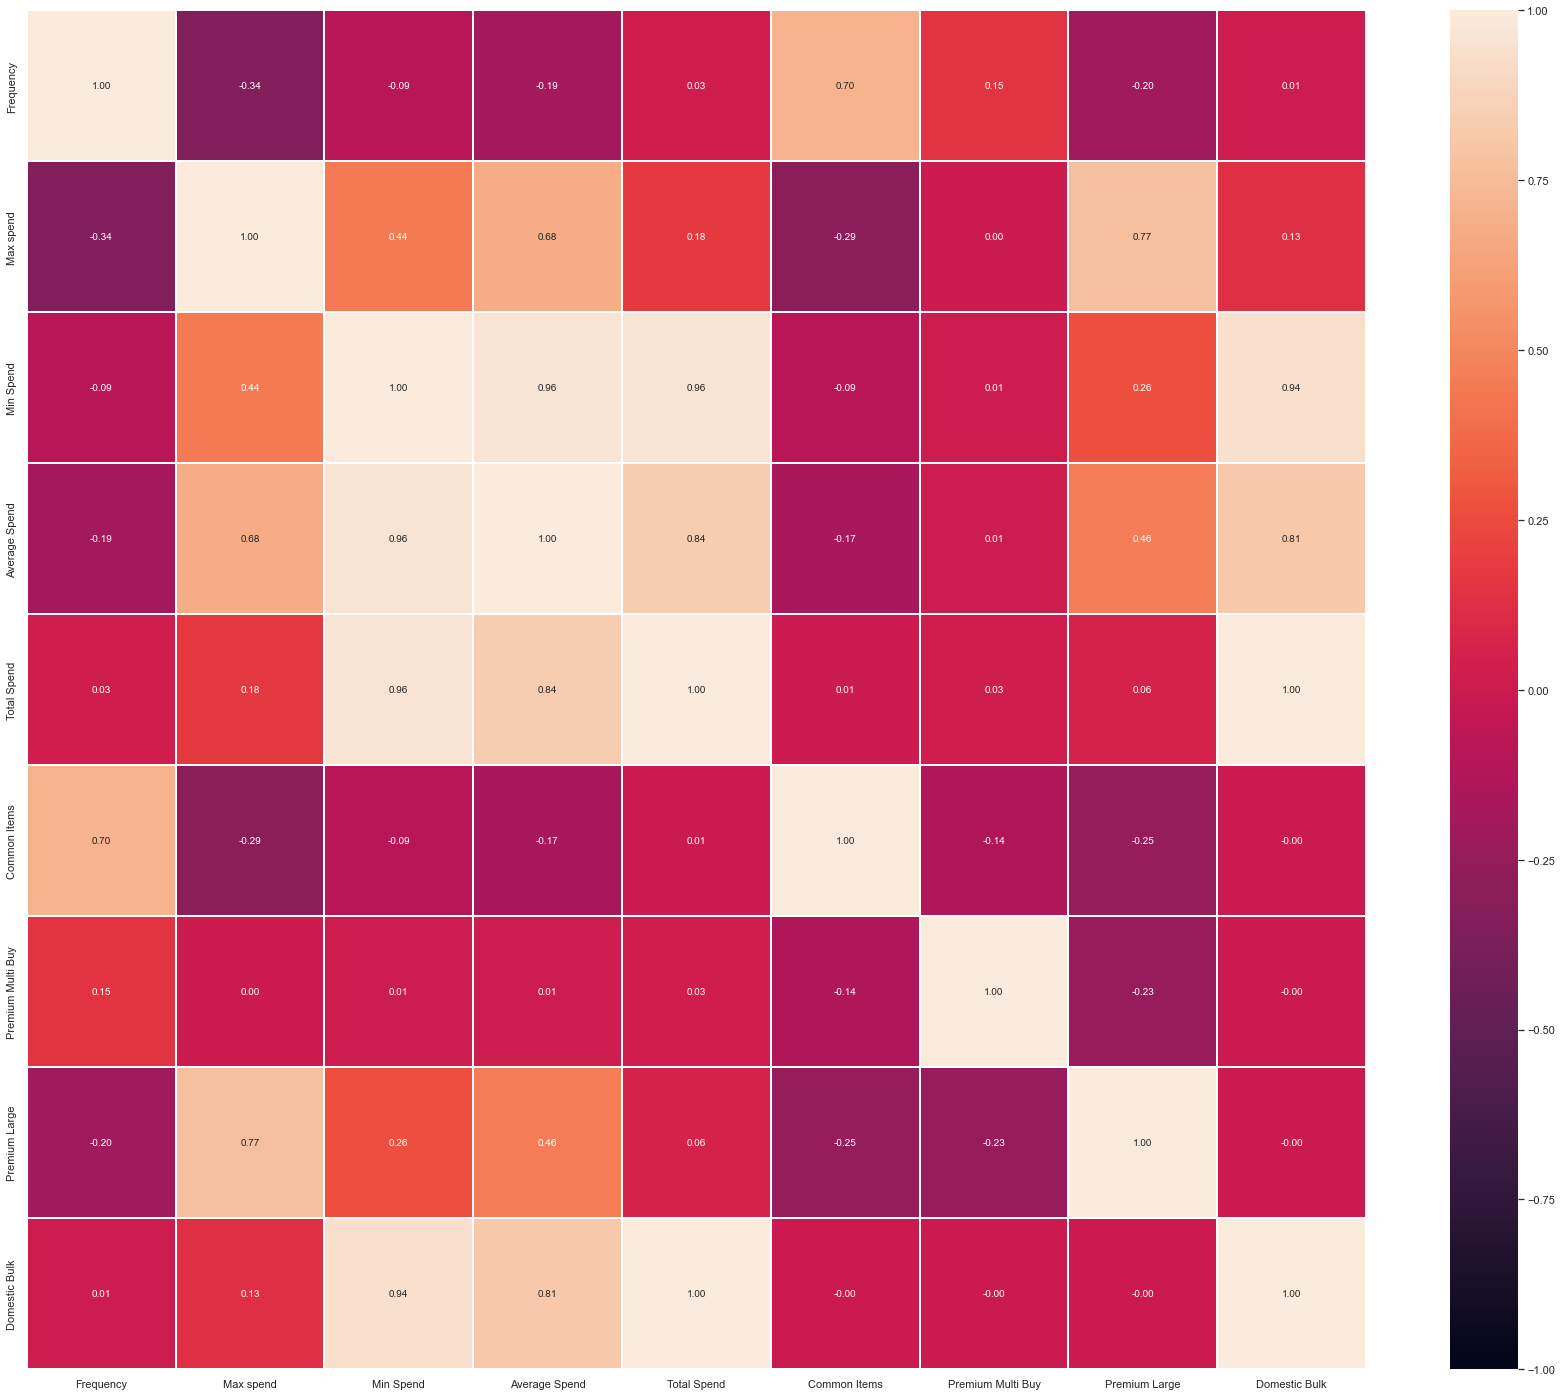

In [432]:
plt.figure(figsize=(30, 25))
corr_df = cat_wise_data.groupby(by=['CustomerID'])['Price'].agg(['count','min','max','mean','sum'])
large_appliance = [18, 17]
seasonal_appliances = [13, 27, 3]
fan = [21, 8]
others = [11, 19, 24, 20, 22, 25, 1, 5, 14]

for i in range(0, len(le_cat_mapping.keys())):
    col = 'categ_{}'.format(i)
    corr_df.loc[:,col] = cat_wise_data.groupby(by=['CustomerID'])[col].sum()
    
corr_df["Common_Items"] = 0
corr_df["Premium Multi Buy"] = 0
corr_df["Premium Large"] = 0
corr_df["Domestic Bulk"] = 0
label = "Frequency","Max spend","Min Spend","Average Spend","Total Spend","Common Items","Premium Multi Buy","Premium Large","Domestic Bulk"

for i in range(0, len(le_cat_mapping.keys())):
    col = 'categ_{}'.format(i)
    if i in common_items:
        corr_df["Common_Items"] = corr_df["Common_Items"] + corr_df[col]
        corr_df.drop(col, axis = 1, inplace = True)
        print(f'Dropped {col}')
    elif i in premium_multi:
        corr_df["Premium Multi Buy"] = corr_df["Premium Multi Buy"] + corr_df[col]
        corr_df.drop(col, axis = 1, inplace = True)
    elif i in premium_one_time:
        corr_df["Premium Large"] = corr_df["Premium Large"] + corr_df[col]
        corr_df.drop(col, axis = 1, inplace = True)
    elif i in domestic_bulk:
        corr_df["Domestic Bulk"] = corr_df["Domestic Bulk"] + corr_df[col]
        corr_df.drop(col, axis = 1, inplace = True)
        
# corr_df.head(-10)

# corr_df.Category = le_cat.transform(corr_df.Category)
temp_corr=corr_df.corr()
sns.heatmap(temp_corr, annot=True, xticklabels=label, yticklabels=label, cmap = 'rocket', fmt=".2f",
            vmin = -1, vmax = 1, linewidths = 0.15, linecolor = 'white', cbar = True)
# plt.show()

# corr_df.to_csv(r'C:\Users\33669\Desktop\Clusturing_tmep\transformed_data_raw.csv')


In [433]:
c_purchase['hil_invoicedate'] = pd.to_datetime(c_purchase['hil_invoicedate'], format='%d-%m-%Y')
last_date = c_purchase['hil_invoicedate'].max().date()

first_registration = pd.DataFrame(c_purchase.groupby(by=['CustomerID'])['hil_invoicedate'].min())
last_purchase      = pd.DataFrame(c_purchase.groupby(by=['CustomerID'])['hil_invoicedate'].max())

test  = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

filtered_transactions_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop = False)['hil_invoicedate']
filtered_transactions_per_user.loc[:, 'FirstPurchase'] = test.reset_index(drop = False)['hil_invoicedate']


filtered_transactions_per_user.sort_values('CustomerID', ascending = True)[:100]



C:\Users\33669\AppData\Local\Temp\1\ipykernel_32680\2089624611.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_transactions_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop = False)['hil_invoicedate']
C:\Users\33669\AppData\Local\Temp\1\ipykernel_32680\2089624611.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_transactions_per_user.loc[:, 'FirstPurchase'] = test.reset_index(drop = False)['hil_invoicedate']


,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,...,categ_20,categ_21,categ_22,categ_23,categ_24,categ_25,categ_26,categ_27,LastPurchase,FirstPurchase
0,0,2,18490,20190,19340.000000,38680,0.0,-0.0,0.0,0.0,...,-0.0,0.0,-0.0,0.0,0.0,0.000000,0.0,-0.0,244,244
1,1,1,16290,16290,16290.000000,16290,0.0,-0.0,0.0,0.0,...,-0.0,0.0,-0.0,0.0,0.0,0.000000,0.0,-0.0,56,56
2,2,1,53,53,53.000000,53,0.0,-0.0,0.0,0.0,...,-0.0,0.0,-0.0,0.0,0.0,119.165426,0.0,-0.0,367,367
3,4,4,2980,3355,3217.500000,12870,0.0,-0.0,0.0,0.0,...,-0.0,0.0,-0.0,0.0,0.0,0.000000,0.0,-0.0,256,292
4,5,1,59990,59990,59990.000000,59990,0.0,-0.0,0.0,0.0,...,-0.0,0.0,-0.0,0.0,0.0,0.000000,0.0,-0.0,280,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,97,2,22490,23890,23190.000000,46380,0.0,-0.0,0.0,0.0,...,-0.0,0.0,-0.0,0.0,0.0,0.000000,0.0,-0.0,284,284
96,98,3,561,60990,20717.666667,62153,0.0,-0.0,0.0,0.0,...,-0.0,0.0,-0.0,0.0,0.0,0.000000,0.0,-0.0,215,215
97,99,6,2880,3355,3106.666667,18640,0.0,-0.0,0.0,0.0,...,-0.0,0.0,-0.0,0.0,0.0,0.000000,0.0,-0.0,189,189
98,100,3,5490,6190,5850.000000,17550,0.0,-0.0,0.0,0.0,...,-0.0,0.0,-0.0,0.0,0.0,0.000000,0.0,-0.0,496,506


In [434]:

for i in range(0, len(le_cat_mapping.keys())):
    print(f'Category {i}: ')
    print(filtered_transactions_per_user[f'categ_{i}'].sum())

Category 0: 
39270048.193470374
Category 1: 
1892341.016496018
Category 2: 
-757841.95606991
Category 3: 
242130258.7926209
Category 4: 
718273733.9685802
Category 5: 
48187739.382236846
Category 6: 
0.0
Category 7: 
3253970.4793678657
Category 8: 
3172911154.1696653
Category 9: 
27176669.00502972
Category 10: 
24741763.265953414
Category 11: 
421242221.7158298
Category 12: 
1066029280.6744112
Category 13: 
4851988177.323161
Category 14: 
769245.2988481595
Category 15: 
9912160350.612335
Category 16: 
1357191610.4629683
Category 17: 
1043026013.0589823
Category 18: 
300333383.80005413
Category 19: 
767112.4293048973
Category 20: 
3219748.303797468
Category 21: 
160058263.20457357
Category 22: 
14510.0
Category 23: 
35420.0
Category 24: 
2096345.1225225227
Category 25: 
327138.4627659575
Category 26: 
196594775.10046592
Category 27: 
314070017.77128345


In [435]:
# transactions_per_user.CustomerID = le.inverse_transform(transactions_per_user.CustomerID)
# transactions_per_user.to_csv(r'C:\Users\33669\Desktop\Clusturing_tmep\transformed_data.csv')

n1 = filtered_transactions_per_user[filtered_transactions_per_user['count'] > 1].shape[0]
n2 = filtered_transactions_per_user.shape[0]
print("No of customers with only 1 product: {:<2}/{:<5} ({:<2.2f}%)".format(n1,n2,n1/n2*100))

No of customers with only 1 product: 137263/335433 (40.92%)


In [436]:
list_cols = ['count','min','max','mean']
for i in range(0, len(le_cat_mapping)):
    list_cols.append(f'categ_{i}')
    
selected_customers = filtered_transactions_per_user.copy(deep = True)
matrix = selected_customers[list_cols].values
matrix = selected_customers[list_cols].to_numpy()

scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)


variables mean values: 
------------------------------------------------------------------------------------------
 [ 2.15266536e+00  2.19797586e+04  2.27245051e+04  2.23328017e+04
  1.17072704e+02  5.64148732e+00 -2.25929457e+00  7.21843882e+02
  2.14133295e+03  1.43658314e+02  0.00000000e+00  9.70080606e+00
  9.45915027e+03  8.10196642e+01  7.37606713e+01  1.25581628e+03
  3.17806918e+03  1.44648504e+04  2.29329046e+00  2.95503434e+04
  4.04608852e+03  3.10949135e+03  8.95360277e+02  2.28693190e+00
  9.59878218e+00  4.77169101e+02  4.32575209e-02  1.05594858e-01
  6.24966870e+00  9.75272149e-01  5.86092528e+02  9.36312223e+02]


In [437]:
import pickle
filename = r"C:\Users\33669\Desktop\Clusturing_tmep\2model_n11_scaling_IP_outlier_removed.pkl"


n_clusters = 11
try:

    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(scaled_matrix)
    clusters_clients = kmeans.predict(scaled_matrix)
    silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
    print('Silhouette Score : {:<.3f}'.format(i, silhouette_avg))
except Exception as e:
    print(f'Error with n_custer number: {e}')
    pass


with open(r"C:\Users\33669\Desktop\Clusturing_tmep\model_scaling_IP_NOoutlier_fixed.pkl", "wb") as f:
    pickle.dump(kmeans, f)

# loaded_model = pickle.load(open(filename, 'rb'))
# clusters_clients = loaded_model.predict(scaled_matrix)
# silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
# print('Silhouette Score : {:<.3f}'.format(i, silhouette_avg))


"""
from sklearn.cluster import DBSCAN

# Load the dataset

# Create a DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=8, n_jobs=-1)

# Fit the DBSCAN object to the data
dbscan.fit(scaled_matrix)
clusters_clients = dbscan.predict(scaled_matrix)

# Get the cluster labels
cluster_labels = dbscan.labels_

silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('Silhouette Score : {:<.3f}'.format(i, silhouette_avg))
# Get the number of clusters
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

# Print the number of clusters
print(f'Number of clusters: {n_clusters}')
"""

Silhouette Score : 27.000


"\nfrom sklearn.cluster import DBSCAN\n\n# Load the dataset\n\n# Create a DBSCAN object\ndbscan = DBSCAN(eps=0.5, min_samples=8, n_jobs=-1)\n\n# Fit the DBSCAN object to the data\ndbscan.fit(scaled_matrix)\nclusters_clients = dbscan.predict(scaled_matrix)\n\n# Get the cluster labels\ncluster_labels = dbscan.labels_\n\nsilhouette_avg = silhouette_score(scaled_matrix, clusters_clients)\nprint('Silhouette Score : {:<.3f}'.format(i, silhouette_avg))\n# Get the number of clusters\nn_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)\n\n# Print the number of clusters\nprint(f'Number of clusters: {n_clusters}')\n"

In [438]:


pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['no of customer']).T

,0,1,8,7,9,5,6,3,2,10,4
no of customer,197840,89046,43165,5364,9,2,2,2,1,1,1


C:\Users\33669\AppData\Local\Temp\1\ipykernel_32680\265636261.py:44: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


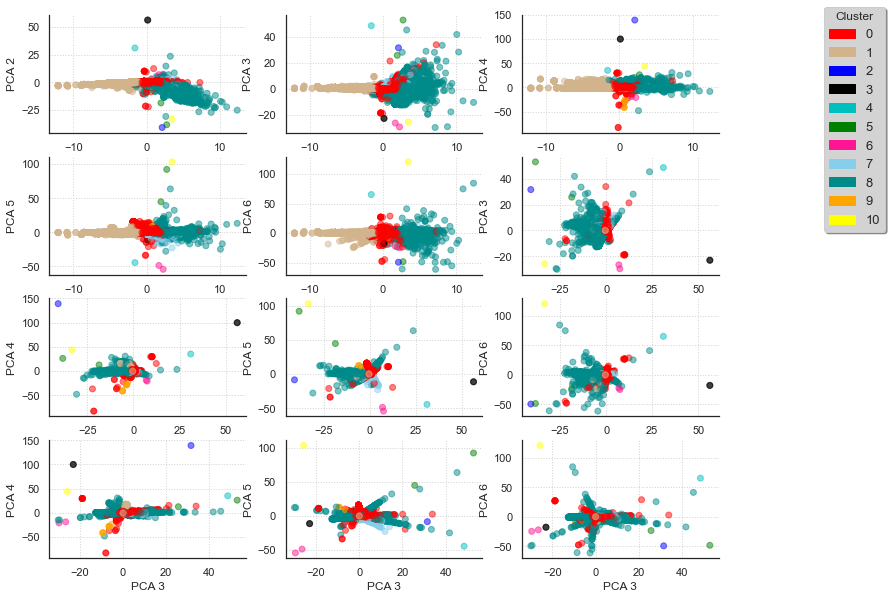

In [439]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
matrix_3D = pca.fit_transform(scaled_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters_clients)
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(6):
    for iy in range(ix+1, 6):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12: break
    if increment == 12: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(11):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout()


In [440]:
filtered_transactions_per_user.loc[:, 'cluster'] = clusters_clients

filtered_transactions_per_user.to_csv(r'C:\Users\33669\Desktop\Clusturing_tmep\clustered_filtered.csv', index=False)

filtered_transactions_per_user.sort_values('cluster', ascending = True)[:100]



C:\Users\33669\AppData\Local\Temp\1\ipykernel_32680\368322084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_transactions_per_user.loc[:, 'cluster'] = clusters_clients


,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,...,categ_21,categ_22,categ_23,categ_24,categ_25,categ_26,categ_27,LastPurchase,FirstPurchase,cluster
0,0,2,18490,20190,19340.000000,38680,0.0,-0.0,0.0,0.0,...,0.0,-0.0,0.0,0.0,0.0,0.000000,-0.0,244,244,0
145998,146987,1,21690,21690,21690.000000,21690,0.0,-0.0,0.0,0.0,...,0.0,-0.0,0.0,0.0,0.0,0.000000,-0.0,2091,2091,0
265252,267008,1,3100,3100,3100.000000,3100,0.0,-0.0,0.0,0.0,...,0.0,-0.0,0.0,0.0,0.0,3528.800233,-0.0,68,68,0
146002,146991,1,26699,26699,26699.000000,26699,0.0,-0.0,0.0,0.0,...,0.0,-0.0,0.0,0.0,0.0,0.000000,-0.0,53,53,0
146004,146993,4,5300,5895,5676.250000,22705,0.0,-0.0,0.0,0.0,...,0.0,-0.0,0.0,0.0,0.0,0.000000,-0.0,270,340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265231,266987,1,17290,17290,17290.000000,17290,0.0,-0.0,0.0,0.0,...,0.0,-0.0,0.0,0.0,0.0,0.000000,-0.0,485,485,0
265230,266986,3,61,67,64.333333,193,0.0,-0.0,0.0,0.0,...,0.0,-0.0,0.0,0.0,0.0,0.000000,-0.0,1217,1217,0
265226,266982,2,4995,5595,5295.000000,10590,0.0,-0.0,0.0,0.0,...,0.0,-0.0,0.0,0.0,0.0,0.000000,-0.0,61,61,0
265224,266980,3,5395,5995,5736.666667,17210,0.0,-0.0,0.0,0.0,...,0.0,-0.0,0.0,0.0,0.0,0.000000,-0.0,543,543,0


In [441]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(filtered_transactions_per_user[filtered_transactions_per_user['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = filtered_transactions_per_user[filtered_transactions_per_user['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])
#_____________________________________________________
merged_df.drop('CustomerID', axis = 1, inplace = True)
print('number of customers:', merged_df['size'].sum())

merged_df = merged_df.sort_values('sum')
merged_df.to_csv(r'C:\Users\33669\Desktop\Clusturing_tmep\cluseter_report.csv', index=False)
merged_df.head(15)


number of customers: 335433


,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,...,categ_21,categ_22,categ_23,categ_24,categ_25,categ_26,categ_27,LastPurchase,FirstPurchase,size
cluster,,,,,,,,,,,,,,,,,,,,,
2.0,5.000000,1380.000000,1535.000000,1451.000000,7255.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,14510.0,0.0,0.000000,0.000000,0.000000,0.000000,362.000000,362.000000,1
3.0,1.000000,8855.000000,8855.000000,8855.000000,8855.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,17710.0,0.000000,0.000000,0.000000,0.000000,240.000000,240.000000,2
10.0,2.000000,4950.000000,5200.000000,5075.000000,10150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,144.000000,144.000000,1
9.0,1.000000,16083.888889,16083.888889,16083.888889,16083.888889,0.000000,146471.377386,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,363.888889,385.666667,9
0.0,1.733830,10531.122538,11068.022781,10794.719328,16619.632461,136.378535,2.718730,-11.877048,41.321456,3611.773942,...,389.097477,0.0,0.0,3.950514,1.102579,181.624892,1029.058345,324.119298,334.289800,197840
7.0,1.674683,15539.446868,17291.620060,16248.874371,22240.842655,52.144114,0.131233,1.310666,43322.371447,8.667242,...,115.901059,0.0,0.0,0.000000,0.310560,115.009311,96.939553,322.456376,332.456935,5364
6.0,2.500000,13597.500000,14616.500000,14114.916667,34066.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,365822.934985,0.000000,0.000000,0.000000,112.500000,112.500000,2
8.0,6.399096,7103.028194,9092.676173,8029.269913,43862.366894,277.213888,0.822916,36.716851,36.084841,52.061089,...,1908.891812,0.0,0.0,13.509315,2.486701,3706.736751,2535.672923,322.352925,332.300429,43165
4.0,5.000000,10160.000000,11885.000000,10901.000000,54505.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,320.000000,320.000000,1


In [442]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, decoded_labels, n_ordinate_levels=6, ):
        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]
        # print(label)
            
        _, text = axes[0].set_thetagrids(angles, labels = decoded_labels)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = [2,4,6,8,10]
            grid_label = ["2","4","6","8","10"]

            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes,fontsize=15, *args, **kw)

merged_df.head(10)

,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,...,categ_21,categ_22,categ_23,categ_24,categ_25,categ_26,categ_27,LastPurchase,FirstPurchase,size
cluster,,,,,,,,,,,,,,,,,,,,,
2.0,5.000000,1380.000000,1535.000000,1451.000000,7255.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,14510.0,0.0,0.000000,0.000000,0.000000,0.000000,362.000000,362.000000,1
3.0,1.000000,8855.000000,8855.000000,8855.000000,8855.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,17710.0,0.000000,0.000000,0.000000,0.000000,240.000000,240.000000,2
10.0,2.000000,4950.000000,5200.000000,5075.000000,10150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,144.000000,144.000000,1
9.0,1.000000,16083.888889,16083.888889,16083.888889,16083.888889,0.000000,146471.377386,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,363.888889,385.666667,9
0.0,1.733830,10531.122538,11068.022781,10794.719328,16619.632461,136.378535,2.718730,-11.877048,41.321456,3611.773942,...,389.097477,0.0,0.0,3.950514,1.102579,181.624892,1029.058345,324.119298,334.289800,197840
7.0,1.674683,15539.446868,17291.620060,16248.874371,22240.842655,52.144114,0.131233,1.310666,43322.371447,8.667242,...,115.901059,0.0,0.0,0.000000,0.310560,115.009311,96.939553,322.456376,332.456935,5364
6.0,2.500000,13597.500000,14616.500000,14114.916667,34066.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,365822.934985,0.000000,0.000000,0.000000,112.500000,112.500000,2
8.0,6.399096,7103.028194,9092.676173,8029.269913,43862.366894,277.213888,0.822916,36.716851,36.084841,52.061089,...,1908.891812,0.0,0.0,13.509315,2.486701,3706.736751,2535.672923,322.352925,332.300429,43165
4.0,5.000000,10160.000000,11885.000000,10901.000000,54505.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,320.000000,320.000000,1


['Frequency', 'Min basket cost', 'Max basket cost', 'Average basket cost', 'Days since Last purchase', 'Days since First purchase', 'Total Spent', 'CONSUMER LIGHTING', 'CRABTREE BCP', 'CRABTREE EWA', 'HAVELLS AIR COOLER', 'HAVELLS AQUA', 'HAVELLS BCP', 'HAVELLS CABLE', 'HAVELLS EWA', 'HAVELLS FAN', 'HAVELLS GROOMING', 'HAVELLS IP', 'HAVELLS PUMP', 'HAVELLS SDA', 'HAVELLS WATER HEATER', 'HAVELLS WIRE', 'LLOYD AIR CONDITIONER', 'LLOYD LED TELEVISION', 'LLOYD REFRIGERATORS', 'LLOYD WASHING MACHIN', 'REO BCP', 'REO EWA', 'REO FAN', 'REO WIRE.', 'SOLAR OTHERS', 'STANDARD BCP', 'STANDARD EWA', 'STANDARD FAN', 'STANDARD WATERHEATER']


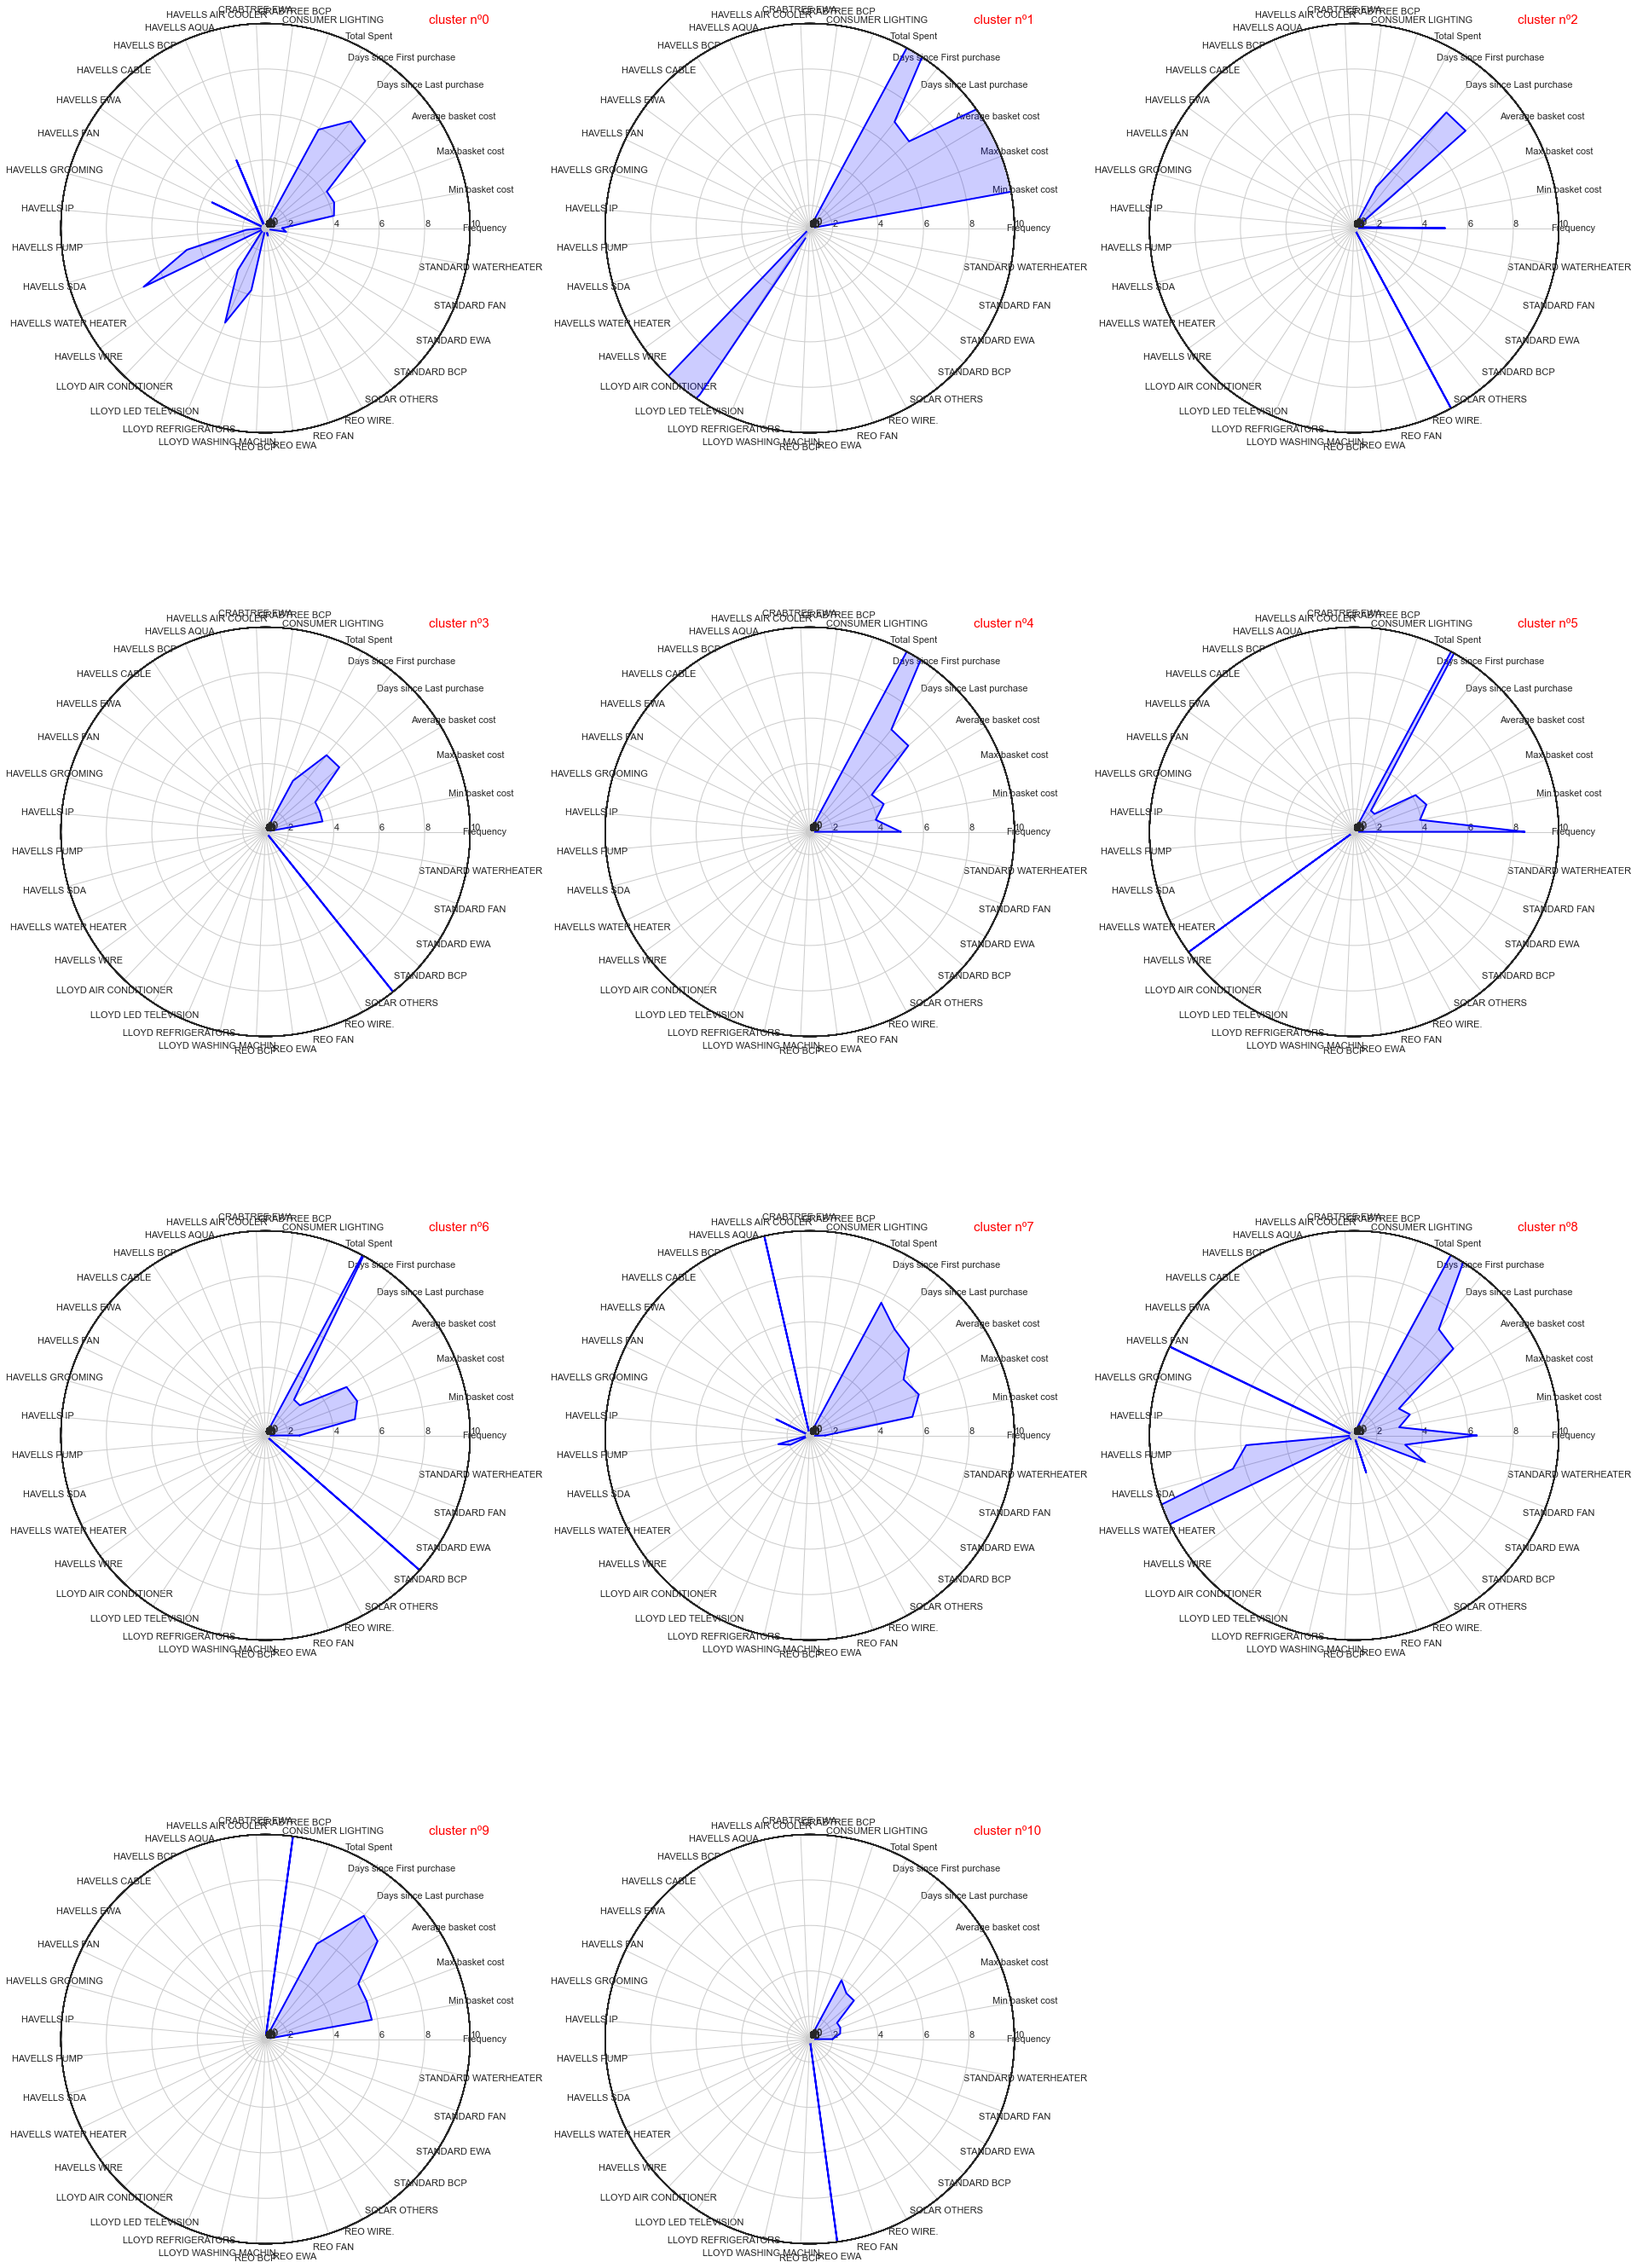

In [451]:
fig = plt.figure(figsize=(20,25))

attributes = ['count','min','max','mean', 'LastPurchase','FirstPurchase','sum']
decoded_labels = ['Frequency','Min basket cost','Max basket cost','Average basket cost', 'Days since Last purchase','Days since First purchase','Total Spent']
ranges = [[1, 10], [500, 30000], [500, 30000], [500, 30000], [1, 500], [1, 500], [500, 30000]]
index  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

for i in range(0, len(le_cat_mapping)):
    attributes.append(f'categ_{i}')
    ranges.append([0, 10000])

n_groups = n_clusters ; i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for i in range(0, len(attributes[7:])):
    try:
        inv_trans = le_cat_mapping.get(i)
        decoded_labels.append(inv_trans)
        # print(inv_trans)
    except Exception as e:
        decoded_labels.append(attributes[i])

print(decoded_labels)

for ind in range(n_clusters):
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.11) ; pos_y = iy*(size_y + 0.06)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    #______________________________________________________
    data = np.array(merged_df.loc[index[ind], attributes])
    radar = RadarChart(fig, location, sizes, attributes, ranges, decoded_labels)
    radar.plot(data, color = 'b', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster nº{}'.format(index[ind]), color = 'r')
    ind += 1 

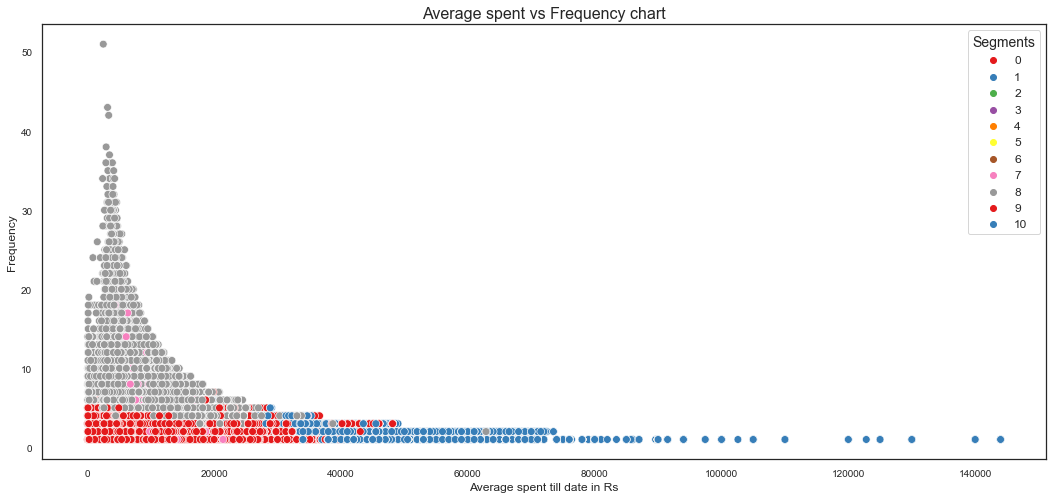

In [461]:
plt.figure(figsize = (18, 8))
sns.scatterplot(data = filtered_transactions_per_user,
                x = 'mean',
                y = 'count',
                hue ='cluster',
                palette = 'Set1',
                s = 60)
plt.title('Average spent vs Frequency chart', size = 16)
plt.xlabel('Average spent till date in Rs', size = 12)
plt.ylabel('Frequency', size = 12)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.legend(loc = 'best', fontsize = 12,
           title = 'Segments',title_fontsize=14)
plt.show()

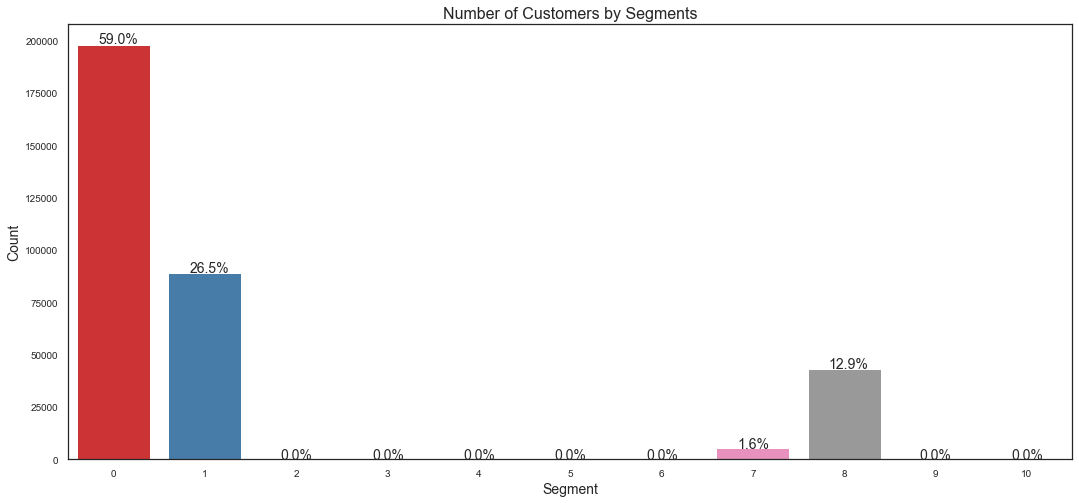

In [445]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(data = filtered_transactions_per_user,
                   x = 'cluster',
                   palette = 'Set1')
total = len(filtered_transactions_per_user.cluster)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

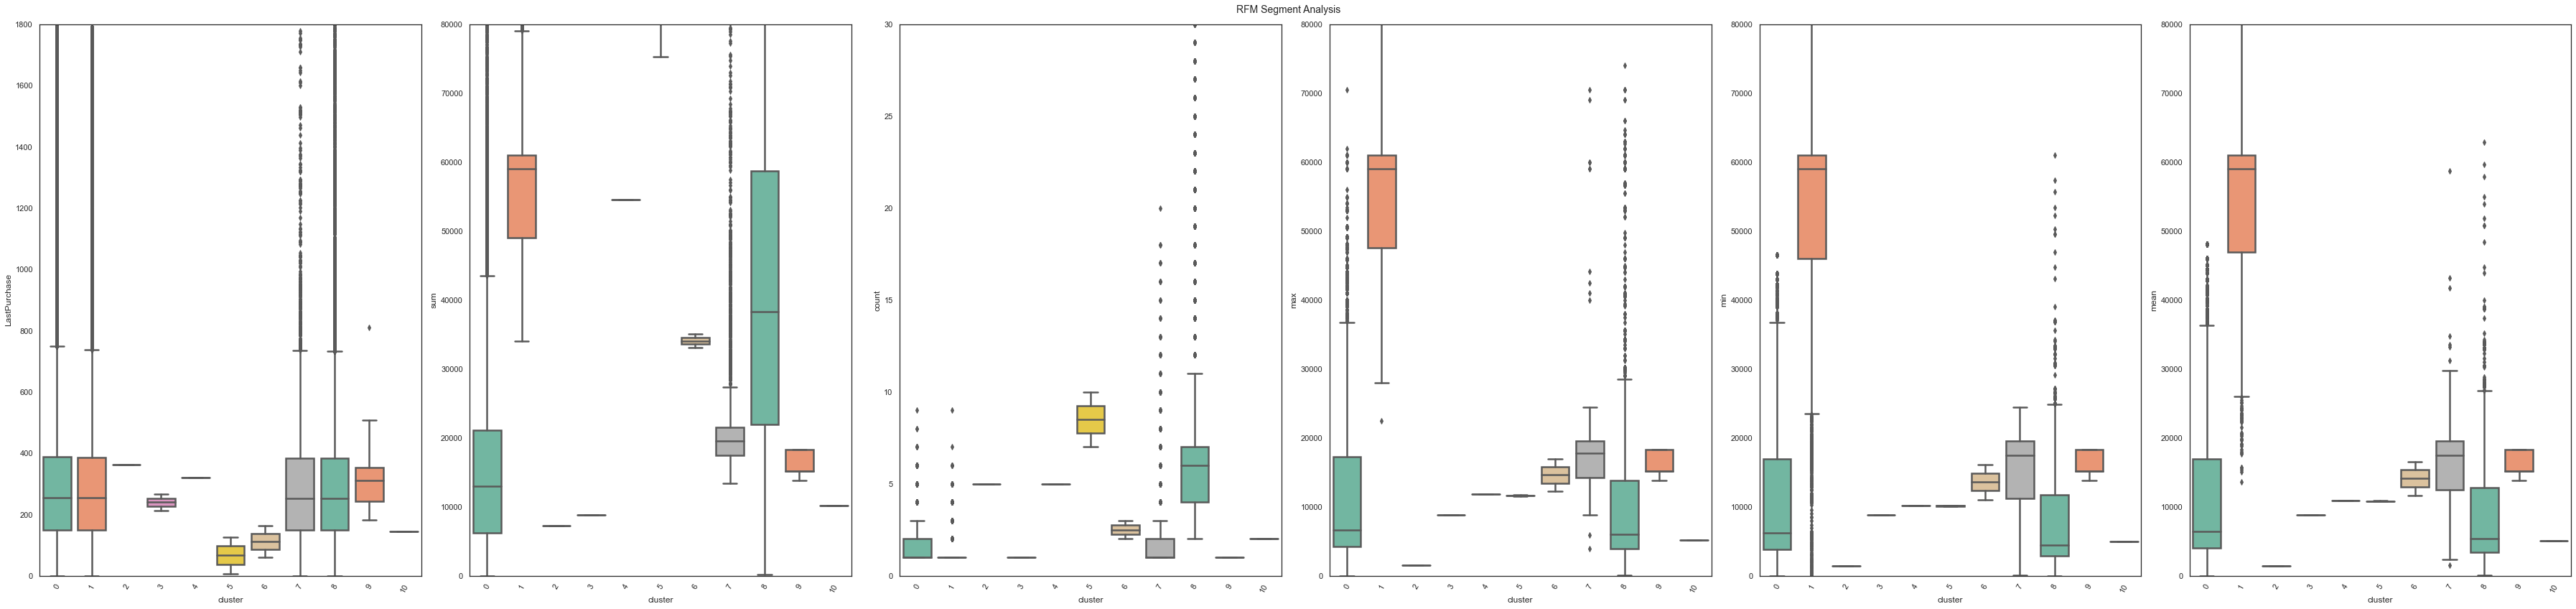

In [446]:
# /count	min	max	mean	sum	categ_0	categ_1	categ_2	categ_3	categ_4	...	categ_21	categ_22	categ_23	categ_24	categ_25	categ_26	categ_27	LastPurchase	FirstPurchase	size
fig, axes = plt.subplots(1, 6, figsize = (50, 12))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['LastPurchase', 'sum', 'count', 'max', 'min', 'mean']
for idx, col in enumerate(feature_list):
    sns.boxplot(ax = axes[idx], data = filtered_transactions_per_user,
                x = 'cluster', y = feature_list[idx],
                palette= 'Set2')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    
    if idx == 2:
        axes[idx].set_ylim([0, 30])
    elif idx == 0:
        axes[idx].set_ylim([0, 1800])
    else:
        axes[idx].set_ylim([0, 80000])
plt.tight_layout()
plt.show()